# Fase 4: Problema de A/B Testing.

El objetivo de esta fase es determinar si existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados, y si es así, cuál es la magnitud de esa relación. Partiremos de la siguiente hipótesis, "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa". Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

* Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.
* Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.

La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).

Por lo tanto, los pasos que deberás seguir en esta fase son:

* Divide a los empleados en los grupos A y B según los criterios establecidos.
* Calcula la tasa de rotación (porcentaje de empleados que dejaron la empresa) en cada grupo.
* Realiza un análisis estadístico para determinar si hay una diferencia significativa en la tasa de rotación entre los grupos A y B.
* Analiza los resultados.

Calcular la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.

In [267]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
from itertools import combinations

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [268]:
df = pd.read_csv('../data/hr_data_transformed_2024-08-02_16:14:18.csv', index_col=0)
df.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Unknown,162.0,1.0,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,11.318934,5,3.0,20,15,15,1972,True
1,52,No,Unknown,699.0,Unknown,1,4,Life Sciences,259.0,3.0,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,34.000000,5,3.0,33,11,9,1971,1
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,319.0,3.0,Male,58.0,3,5,Manager,4,Married,19232.0,4933,1,No,11,3.0,4,0,22.000000,3,3.0,22,11,15,1981,1


In [269]:
df.attrition.unique()

array(['No', 'Yes'], dtype=object)

In [270]:
df.job_satisfaction.unique()

array([3, 4, 1, 2])

In [271]:
def create_test_group(val):
    if val >= 3:
        return "group_a"
    else:
        return "group_b"

In [272]:
df['test_group'] = df.job_satisfaction.apply(create_test_group)

In [273]:
df.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,test_group
0,51,No,Unknown,684.0,Research & Development,6,3,Unknown,162.0,1.0,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,11.318934,5,3.0,20,15,15,1972,True,group_a
1,52,No,Unknown,699.0,Unknown,1,4,Life Sciences,259.0,3.0,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,34.000000,5,3.0,33,11,9,1971,1,group_a


In [274]:
contingency_table = pd.crosstab(df.test_group, df.attrition)
contingency_table

attrition,No,Yes
test_group,,
group_a,859,136
group_b,496,123


# Hipótesis

- **Hipótesis Nula (H0):** No hay una relación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados. 
- **Hipótesis Alternativa (H1):** Existe una relación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados.

In [275]:
chi2, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en las tasas de conversión entre el grupo 'a' y el grupo 'b'.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de conversión son distintas.""")
else:
    print("No hay evidencia de una diferencia significativa en las tasas de conversión entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de conversión son distintas.""")

Hay una diferencia significativa en las tasas de conversión entre el grupo 'a' y el grupo 'b'.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de conversión son distintas.


### Análisis de Resultados

**1. Interpretación de la Prueba Chi-Cuadrado:**

- **Resultado:** "Hay evidencia de una diferencia significativa en las tasas de rotación entre los grupos."
- **Interpretación:** Esto indica que se encontró evidencia estadística suficiente para afirmar que existe una diferencia significativa en la tasa de rotación entre el Grupo A (satisfacción en el trabajo igual o superior a 3) y el Grupo B (satisfacción en el trabajo inferior a 3).

**2. Conclusión Basada en la Hipótesis:**

- **Hipótesis Nula (H0):** No hay una relación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados. 
- **Hipótesis Alternativa (H1):** Existe una relación significativa entre el nivel de satisfacción en el trabajo y la rotación de empleados.

Dado que se encontró evidencia suficiente para rechazar la hipótesis nula, concluimos que **hay una relación estadísticamente significativa** entre el nivel de satisfacción en el trabajo y la rotación de empleados en esta prueba. En otras palabras, los datos **sugieren** que los empleados con niveles de satisfacción más bajos tienen una probabilidad significativamente mayor de dejar la empresa en comparación con aquellos con niveles de satisfacción más altos.

- **Hallazgo Principal:** Se encontró una diferencia estadísticamente significativa en la tasa de rotación entre los empleados con alta y baja satisfacción en el trabajo.
- **Recomendaciones para Acción:** Dado que se identificó una relación significativa, es crucial que la empresa implemente estrategias para mejorar la satisfacción de los empleados, lo que podría ayudar a reducir la rotación.


## Cálculo de la tasa de rotación

In [276]:
# Cálculo de la tasa de rotación en cada grupo
tasa_rot_grupo_a = round(df[df.test_group == 'group_a'].attrition.value_counts()[1]/len(df[df.test_group == 'group_a']), 2)
tasa_rot_grupo_a

0.14

In [277]:
tasa_rot_grupo_b = round(df[df.test_group == 'group_b'].attrition.value_counts()[1]/len(df[df.test_group == 'group_b']), 2)
tasa_rot_grupo_b

0.2

## Diferencia de Proporciones

In [278]:
diferencia_proporciones = tasa_rot_grupo_b - tasa_rot_grupo_a
diferencia_proporciones

0.06

## Visualización de la Diferencia

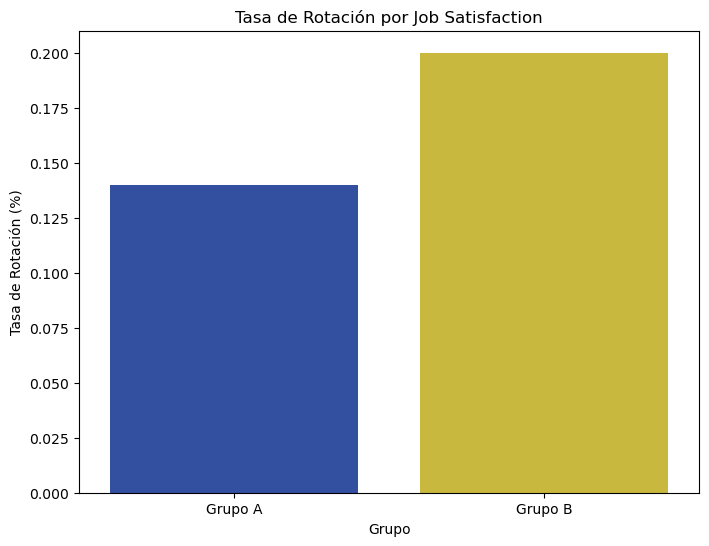

In [279]:
df_comparacion = pd.DataFrame({
    'Grupo': ['Grupo A', 'Grupo B'],
    'Tasa de Rotación': [tasa_rot_grupo_a, tasa_rot_grupo_b]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Grupo', y='Tasa de Rotación', data=df_comparacion, palette=['#2146B2', '#E0CA27'])
plt.title('Tasa de Rotación por Job Satisfaction')
plt.xlabel('Grupo')
plt.ylabel('Tasa de Rotación (%)')
plt.show()


# Analisis de otras variables relevantes para el problema

In [266]:
lista = ['environment_satisfaction', 'relationship_satisfaction', 'job_satisfaction', 'work_life_balance']

for metrica in lista:
    df['test_group'] = df[metrica].apply(create_test_group)
    contingency_table = pd.crosstab(df.test_group, df.attrition)
    
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        print(contingency_table)
        print()
        print(f"{metrica.upper()}:")
        print("Hay una diferencia significativa en las tasas de rotación entre el grupo 'a' y el grupo 'b'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")

    else:
        pass

    

attrition    No  Yes
test_group          
group_a     882  137
group_b     473  122

ENVIRONMENT_SATISFACTION:
Hay una diferencia significativa en las tasas de rotación entre el grupo 'a' y el grupo 'b'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition    No  Yes
test_group          
group_a     859  136
group_b     496  123

JOB_SATISFACTION:
Hay una diferencia significativa en las tasas de rotación entre el grupo 'a' y el grupo 'b'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition     No  Yes
test_group           
group_a     1003  173
group_b      352   86

WORK_LIFE_BALANCE:
Hay una diferencia significativa en las tasas de rotación entre el grupo 'a' y el grupo 'b'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 



0.13
0.21


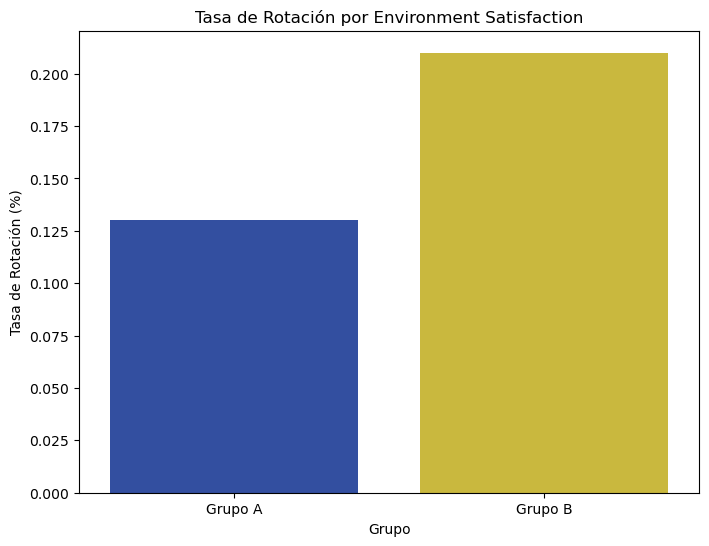

In [265]:
# # Cálculo de la tasa de rotación en cada grupo
# tasa_rot_grupo_a = round(df[df.test_group == 'group_a'].attrition.value_counts()[1]/len(df[df.test_group == 'group_a']), 2)
# print(tasa_rot_grupo_a)

# tasa_rot_grupo_b = round(df[df.test_group == 'group_b'].attrition.value_counts()[1]/len(df[df.test_group == 'group_b']), 2)
# print(tasa_rot_grupo_b)

# df_comparacion = pd.DataFrame({
#     'Grupo': ['Grupo A', 'Grupo B'],
#     'Tasa de Rotación': [tasa_rot_grupo_a, tasa_rot_grupo_b]
# })

# plt.figure(figsize=(8, 6))
# sns.barplot(x='Grupo', y='Tasa de Rotación', data=df_comparacion, palette=['#2146B2', '#E0CA27'])
# plt.title('Tasa de Rotación por Environment Satisfaction')
# plt.xlabel('Grupo')
# plt.ylabel('Tasa de Rotación (%)')
# plt.show()

attrition   No  Yes
over_time          
No         609   73
Yes        178   78

OVER_TIME:
Hay una diferencia significativa en las tasas de rotación entre el grupo 'No' y el grupo 'Yes'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 



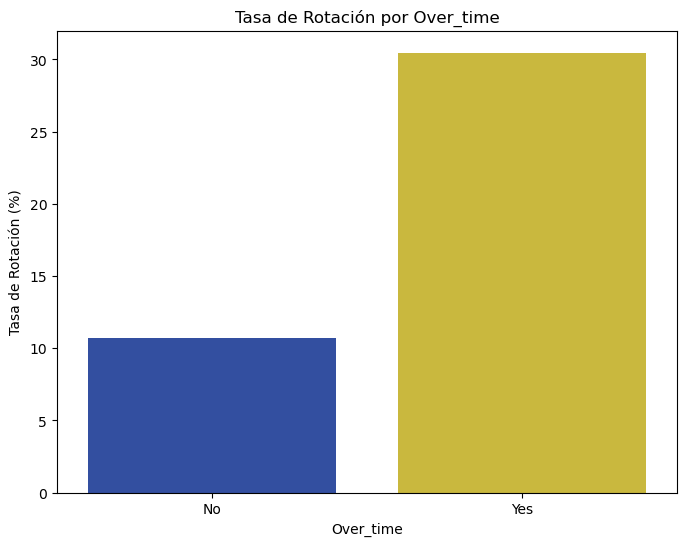

attrition                No  Yes
department                      
Research & Development  860  141
Sales                   365   99

DEPARTMENT:
Hay una diferencia significativa en las tasas de rotación entre el grupo 'Research & Development' y el grupo 'Sales'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 



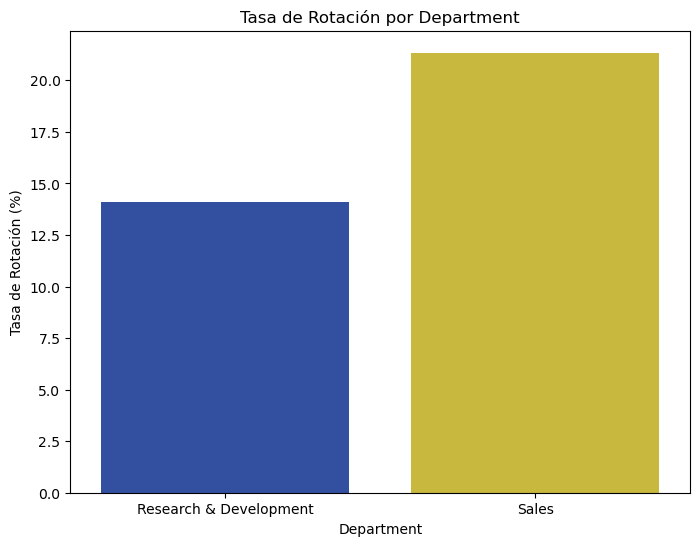

In [263]:
lista = ['over_time', 'education_field', 'department']

for metrica in lista:
    # Generar combinaciones de pares únicos en cada métrica
    combinat = list(combinations(df[metrica][df[metrica] != 'Unknown'].unique(), 2))
    
    for comb in combinat:
        # Crear crosstab para cada combinación de pares
        crosstabs = pd.crosstab(df[metrica][(df[metrica] == comb[0]) | (df[metrica] == comb[1])], df.attrition)
        chi2, p_value, _, _ = chi2_contingency(crosstabs)
        alpha = 0.05
        
        if p_value < alpha:
            print(crosstabs)
            print()
            print(f"{metrica.upper()}:")
            print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{comb[0]}' y el grupo '{comb[1]}'.")
            print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
            print("\n ---------- \n")
            
            # Cálculo de la tasa de rotación para cada grupo
            tasa_rot_grupo_1 = round(df[df[metrica] == comb[0]].attrition.value_counts(normalize=True)[1] * 100, 2)
            tasa_rot_grupo_2 = round(df[df[metrica] == comb[1]].attrition.value_counts(normalize=True)[1] * 100, 2)

            df_comparacion = pd.DataFrame({
                metrica: [comb[0], comb[1]],
                'Tasa de Rotación': [tasa_rot_grupo_1, tasa_rot_grupo_2]
            })

            # Gráfico de barras
            plt.figure(figsize=(8, 6))
            sns.barplot(x=metrica, y='Tasa de Rotación', data=df_comparacion, palette=['#2146B2', '#E0CA27'])
            plt.title(f'Tasa de Rotación por {metrica.capitalize()}')
            plt.xlabel(metrica.capitalize())
            plt.ylabel('Tasa de Rotación (%)')
            plt.show()
        
        else:
            pass



In [233]:
def categorize_years_with_manager(years):
    if years <= 2:
        return '0-2 years'
    elif 3 <= years <= 5:
        return '3-5 years'
    elif 6 <= years <= 10:
        return '6-10 years'
    elif 11 <= years <= 15:
        return '11-15 years'
    else:
        return '16-17 years'


In [234]:
df['years_with_curr_cats'] = df['years_with_curr_manager'].apply(categorize_years_with_manager)

In [237]:
combinat = list(combinations(df.years_with_curr_cats.unique(), 2))

In [239]:
for year in combinat:
    year_attr = pd.crosstab(df.years_with_curr_cats[(df.years_with_curr_cats == year[0])|(df.years_with_curr_cats == year[1])], df.attrition)
    chi2, p_value, _, _ = chi2_contingency(year_attr)
    alpha = 0.05
    if p_value < alpha:
        print(year_attr)
        print()
        print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{year[0]}' y el grupo '{year[1]}'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")
    else:
        pass

attrition              No  Yes
years_with_curr_cats          
0-2 years             581  153
11-15 years            65    3

Hay una diferencia significativa en las tasas de rotación entre el grupo '11-15 years' y el grupo '0-2 years'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition              No  Yes
years_with_curr_cats          
0-2 years             581  153
6-10 years            448   65

Hay una diferencia significativa en las tasas de rotación entre el grupo '6-10 years' y el grupo '0-2 years'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition              No  Yes
years_with_curr_cats          
0-2 years             581  153
3-5 years             250   38

Hay una diferencia significativa en las tasas de rotación entre el grupo '3-5 years' y el grupo '0-2 years'.
Los resultados sugieren que existe evidenci

In [231]:
combinat = list(combinations(df.education.unique(), 2))

In [230]:
for education in combinat:
    educ_attr = pd.crosstab(df.education[(df.education == education[0])|(df.education == education[1])], df.attrition)
    chi2, p_value, _, _ = chi2_contingency(educ_attr)
    alpha = 0.05
    if p_value < alpha:
        print(educ_attr)
        print()
        print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{education[0]}' y el grupo '{education[1]}'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")
    else:
        pass

### Education >> No hay

In [ ]:
combinat = list(combinations(df.job_role.unique(), 2))

In [220]:
for job_role in combinat:
    job_ro_attr = pd.crosstab(df.job_role[(df.job_role == job_role[0])|(df.job_role == job_role[1])], df.attrition)
    chi2, p_value, _, _ = chi2_contingency(job_ro_attr)
    alpha = 0.05
    if p_value < alpha:
        print(job_ro_attr)
        print()
        print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{job_role[0]}' y el grupo '{job_role[1]}'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")
    else:
        pass

attrition           No  Yes
job_role                   
Research Director   86    2
Sales Executive    304   65

Hay una diferencia significativa en las tasas de rotación entre el grupo 'Research Director' y el grupo 'Sales Executive'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition            No  Yes
job_role                    
Research Director    86    2
Research Scientist  262   52

Hay una diferencia significativa en las tasas de rotación entre el grupo 'Research Director' y el grupo 'Research Scientist'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition               No  Yes
job_role                       
Laboratory Technician  212   66
Research Director       86    2

Hay una diferencia significativa en las tasas de rotación entre el grupo 'Research Director' y el grupo 'Laboratory Technician'.
Los resulta

In [205]:
def categorize_monthly_income(income):
    if income < 3000:
        return 'Low'
    elif 3000 <= income < 6000:
        return 'Lower-Middle'
    elif 6000 <= income < 10000:
        return 'Middle'
    elif 10000 <= income < 15000:
        return 'Upper-Middle'
    else:
        return 'High'

In [206]:
df['monthly_income_cat'] = df.monthly_income.apply(categorize_monthly_income)
df.sample(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,test_group,monthly_income_cat
535,24,No,travel_rarely,691.0,Research & Development,23,3,Medical,Unknown,2.0,Male,89.000000,4,1,Research Scientist,4,Unknown,2725.0,21630,1,Unknown,11,3.0,2,2,11.318934,3,3.0,6,1,4,1999,1,group_a,Low
1346,20,Yes,travel_rarely,129.0,Research & Development,4,3,Technical Degree,Unknown,1.0,Male,84.000000,3,1,Laboratory Technician,1,Single,3034.0,13008,1,Unknown,19,3.0,2,0,1.000000,2,3.0,1,0,0,2003,False,group_a,Lower-Middle
913,32,Yes,Unknown,1474.0,Sales,11,4,Other,631.0,4.0,Male,66.028105,4,2,Sales Executive,3,Unknown,5820.5,23914,8,Unknown,12,3.0,4,0,11.318934,2,3.0,4,1,2,1991,1,group_a,Lower-Middle


In [207]:
combinat = list(combinations(df.monthly_income_cat.unique(), 2))
combinat

[('High', 'Lower-Middle'),
 ('High', 'Upper-Middle'),
 ('High', 'Low'),
 ('High', 'Middle'),
 ('Lower-Middle', 'Upper-Middle'),
 ('Lower-Middle', 'Low'),
 ('Lower-Middle', 'Middle'),
 ('Upper-Middle', 'Low'),
 ('Upper-Middle', 'Middle'),
 ('Low', 'Middle')]

In [208]:
for salary_range in combinat:
    salary_attr = pd.crosstab(df.monthly_income_cat[(df.monthly_income_cat == salary_range[0])|(df.monthly_income_cat == salary_range[1])], df.attrition)
    chi2, p_value, _, _ = chi2_contingency(salary_attr)
    alpha = 0.05
    if p_value < alpha:
        print(salary_attr)
        print()
        print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{salary_range[0]}' y el grupo '{salary_range[1]}'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")
    else:
        pass

attrition            No  Yes
monthly_income_cat          
High                169    8
Lower-Middle        554  112

Hay una diferencia significativa en las tasas de rotación entre el grupo 'High' y el grupo 'Lower-Middle'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition            No  Yes
monthly_income_cat          
High                169    8
Upper-Middle         66   12

Hay una diferencia significativa en las tasas de rotación entre el grupo 'High' y el grupo 'Upper-Middle'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition            No  Yes
monthly_income_cat          
High                169    8
Low                 299  100

Hay una diferencia significativa en las tasas de rotación entre el grupo 'High' y el grupo 'Low'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas d

In [209]:
df.remote_work.unique()

array(['True', '1', 'False', '0'], dtype=object)

In [210]:
df['remote_work'] = df['remote_work'].apply(lambda x: True if x in [1, '1', True] else False) 
df.remote_work.unique()

array([False,  True])

In [211]:
lista = ['gender', 'remote_work']

for metrica in lista:
    contingency_table = pd.crosstab(df[metrica], df.attrition)
    print(contingency_table)
    print()

    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    alpha = 0.05
    if p_value < alpha:
        print(f"{metrica.upper()}:")
        print("Hay una diferencia significativa en las tasas de rotación entre el grupo 'a' y el grupo 'b'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")

    else:
        print(f"{metrica.upper()}:")
        print("No hay evidencia de una diferencia significativa en las tasas de rotación entre los grupos.")
        print("""Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")

attrition   No  Yes
gender             
Female     547   96
Male       808  163

GENDER:
No hay evidencia de una diferencia significativa en las tasas de rotación entre los grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition      No  Yes
remote_work           
False        1058  196
True          297   63

REMOTE_WORK:
No hay evidencia de una diferencia significativa en las tasas de rotación entre los grupos.
Los resultados sugieren que no existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 



### Age

In [212]:
def categ_age(val):
    if 20 < val < 30:
        return 'twenties'
    elif val < 40:
        return 'thirties' 
    elif val < 50:
        return 'forties'
    elif val < 60:
        return 'fifties'
    elif 70 > val < 100:
        return 'sixties and beyond'
    else:
        return 'under 20'

In [213]:
df['age_cat'] = df.age.apply(categ_age)
df.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,remote_work,test_group,monthly_income_cat,age_cat
0,51,No,Unknown,684.0,Research & Development,6,3,Unknown,162.0,1.0,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,No,13,3.0,3,0,11.318934,5,3.0,20,15,15,1972,False,group_a,High,fifties
1,52,No,Unknown,699.0,Unknown,1,4,Life Sciences,259.0,3.0,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Unknown,14,3.0,1,1,34.000000,5,3.0,33,11,9,1971,True,group_a,High,fifties


In [214]:
combinat = list(combinations(df.age_cat.unique(), 2))
combinat

[('fifties', 'forties'),
 ('fifties', 'thirties'),
 ('fifties', 'sixties and beyond'),
 ('fifties', 'twenties'),
 ('forties', 'thirties'),
 ('forties', 'sixties and beyond'),
 ('forties', 'twenties'),
 ('thirties', 'sixties and beyond'),
 ('thirties', 'twenties'),
 ('sixties and beyond', 'twenties')]

In [215]:
for age_range in combinat:
    age_attr = pd.crosstab(df.age_cat[(df.age_cat == age_range[0])|(df.age_cat == age_range[1])], df.attrition)
    chi2, p_value, _, _ = chi2_contingency(age_attr)
    alpha = 0.05
    if p_value < alpha:
        print(age_attr)
        print()
        print(f"Hay una diferencia significativa en las tasas de rotación entre el grupo '{age_range[0]}' y el grupo '{age_range[1]}'.")
        print("""Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.""")
        print("\n ---------- \n")
    else:
        pass

attrition   No  Yes
age_cat            
fifties    156   26
twenties   248   84

Hay una diferencia significativa en las tasas de rotación entre el grupo 'fifties' y el grupo 'twenties'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition   No  Yes
age_cat            
forties    349   39
thirties   597  110

Hay una diferencia significativa en las tasas de rotación entre el grupo 'forties' y el grupo 'thirties'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition   No  Yes
age_cat            
forties    349   39
twenties   248   84

Hay una diferencia significativa en las tasas de rotación entre el grupo 'forties' y el grupo 'twenties'.
Los resultados sugieren que existe evidencia estadística para afirmar que las tasas de rotación son distintas.

 ---------- 

attrition   No  Yes
age_cat            
thirties   597  110
t